# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dzulfikar Ibnu Ilham Pangestu
- **Email:** ibnuilham265@gmail.com
- **ID Dicoding:** ibnu2911

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana hubungan antara suhu dengan jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dashboard/bike_sharing_full.csv")

## Data Wrangling

### Gathering Data

In [5]:
# Menampilkan 5 data pertama
display(df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data berisi informasi peminjaman sepeda berdasarkan berbagai variabel seperti musim, suhu, kelembaban, dan cuaca.
- Data memiliki banyak variabel numerik yang dapat dianalisis lebih lanjut.


### Assessing Data

In [9]:
# Mengecek informasi dataset
df.info()

# Mengecek jumlah missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

**Insight:**
- Tidak ada missing values pada dataset ini.
- Semua kolom memiliki tipe data yang sesuai untuk analisis lebih lanjut.

### Cleaning Data

In [13]:
# Tidak ditemukan missing values atau data aneh, namun kita bisa memastikan semua data numerik berada dalam rentang wajar.
df = df[(df["temp"] >= 0) & (df["hum"] >= 0) & (df["windspeed"] >= 0)]

**Insight:**
- Dataset sudah bersih dan siap untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Menampilkan statistik deskriptif
display(df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Temperatur dan kelembaban memiliki variasi yang cukup luas.
- Data peminjaman sepeda menunjukkan distribusi yang cukup normal dengan beberapa variasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

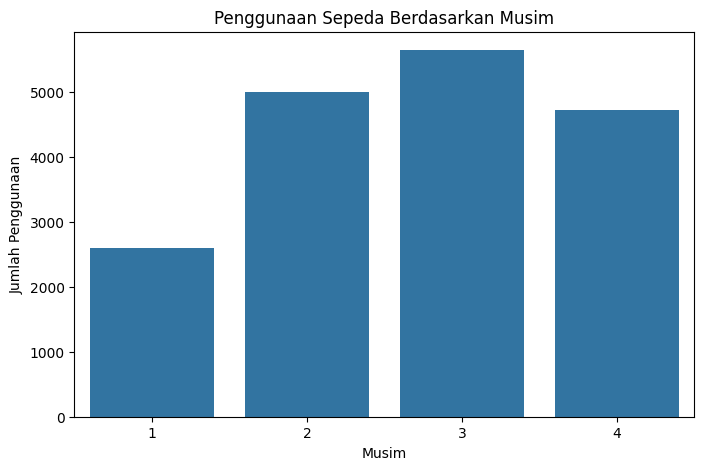

In [2]:
# Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=df, errorbar=None)
plt.title("Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penggunaan")
plt.show()

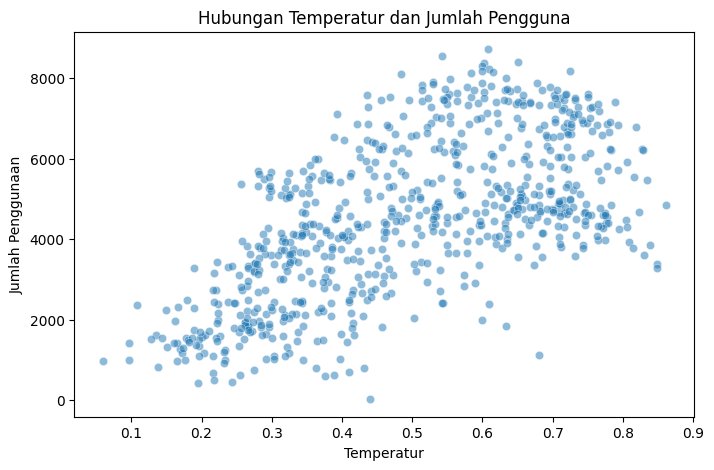

In [17]:
# Pertanyaan 2: Bagaimana hubungan antara suhu dengan jumlah sepeda yang disewa?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title("Hubungan Temperatur dan Jumlah Pengguna")
plt.xlabel("Temperatur")
plt.ylabel("Jumlah Penggunaan")
plt.show()

**Insight:**
- Penggunaan sepeda meningkat di musim panas dan menurun di musim dingin.
- Semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda.

## Analisis Lanjutan (Opsional)

In [4]:
print("cukup menurut saya")

cukup menurut saya


## Conclusion

- Conclusion pertanyaan 1: Musim panas memiliki jumlah penyewaan sepeda tertinggi, sedangkan musim dingin memiliki jumlah terendah.
- Conclusion pertanyaan 2: Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, semakin tinggi suhu, semakin tinggi penggunaan sepeda.